In [1]:
%matplotlib inline
import xarray as xr
import s3fs 
import xarray as xr
import boto3
%matplotlib inline
import dask
import dask.array

In [2]:
from dask.distributed import Client

In [3]:
from dask.distributed import LocalCluster
cluster = LocalCluster()

In [4]:
client = Client(cluster)

In [5]:
client

Client Scheduler: tcp://127.0.0.1:42275 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 2 Memory: 4.12 GB


In [6]:
fs_s3 = s3fs.S3FileSystem()
dataset = []
s3path = 's3://gfdl-esgf/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1/r1i1p1f1/Omon/thetao/gr/v20180701/thetao_Omon_GFDL-CM4_omip1_r1i1p1f1_gr_170801-172712.nc'
remote_file_obj = fs_s3.open(s3path, mode='rb')
dataset.append(remote_file_obj)
index1 = 170801
index2 = 172712
while index1 <= 198801:
    index1 += 2000
    if index1 > 198801:
        break
    index2 += 2000
    s3path = 's3://gfdl-esgf/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1/r1i1p1f1/Omon/thetao/gr/v20180701/thetao_Omon_GFDL-CM4_omip1_r1i1p1f1_gr_' + str(index1) + '-' + str(index2) + '.nc'
    remote_file = fs_s3.open(s3path, mode='rb')
    dataset.append(remote_file)
ds = xr.open_mfdataset(dataset, chunks={'time': 1}, combine='by_coords')

In [7]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lev: 35, lon: 360, time: 3600)
Coordinates:
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time       (time) object 1708-01-16 12:00:00 ... 2007-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(240, 180, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(240, 360, 2), meta=np.ndarray>
    thetao     (time, lev, lat, lon) float32 dask.array<chunksize=(1, 35, 180, 360), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds   (time, lev, bnds) float64 dask.array<chunksize=(240, 35, 2), meta=np.ndarray>
Attributes:
    title:                 NOAA GFDL GFDL-CM4 model output prepared for CMIP6...
    history:               File was processed by fremetar (GFDL analog of CMO...
    external_variables:    areacello volcello
    table_id:              Omon
    activity_id:           OMIP
    branch_method:         none provided
    branch_time_in_child:  [0.]
    comment:               Experiment name = OM4p25_IAF_BLING_csf_rerun\nFor ...
    contact:               gfdl.climate.model.info@noaa.gov
    Conventions:           CF-1.7 CMIP-6.0 UGRID-1.0
    creation_date:         2019-06-04T20:37:54Z
    data_specs_version:    01.00.27
    experiment:            OMIP experiment forced by CORE Inter-Annual Forcin...
    experiment_id:         omip1
    forcing_index:         [1]
    frequency:             mon
    further_info_url:      https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.GFD...
    grid:                  ocean data regridded from tripolar - nominal 0.25 ...
    grid_label:            gr
    initialization_index:  [1]
    institution:           National Oceanic and Atmospheric Administration, G...
    institution_id:        NOAA-GFDL
    license:               CMIP6 model data produced by NOAA-GFDL is licensed...
    mip_era:               CMIP6
    nominal_resolution:    1x1 degree
    parent_activity_id:    no parent
    parent_experiment_id:  no parent
    parent_mip_era:        no parent
    parent_source_id:      no parent
    parent_variant_label:  no parent
    physics_index:         [1]
    product:               model-output
    realization_index:     [1]
    realm:                 ocean
    source:                GFDL-CM4 (2018): \naerosol: interactive\natmos: GF...
    source_id:             GFDL-CM4
    source_type:           OGCM
    sub_experiment:        none
    sub_experiment_id:     none
    tracking_id:           hdl:21.14100/97e4edf3-22e7-4e5f-831a-f2a671b7094f
    variable_id:           thetao
    variant_info:          N/A
    references:            see further_info_url attribute
    variant_label:         r1i1p1f1

In [8]:
temp_mean = ds['thetao'].mean(dim=['time'])

In [9]:
temp_mean.sel(lev=2.5)

<xarray.DataArray 'thetao' (lat: 180, lon: 360)>
dask.array<getitem, shape=(180, 360), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lev      float64 2.5

CPU times: user 1min 40s, sys: 16.4 s, total: 1min 56s
Wall time: 23min 20s


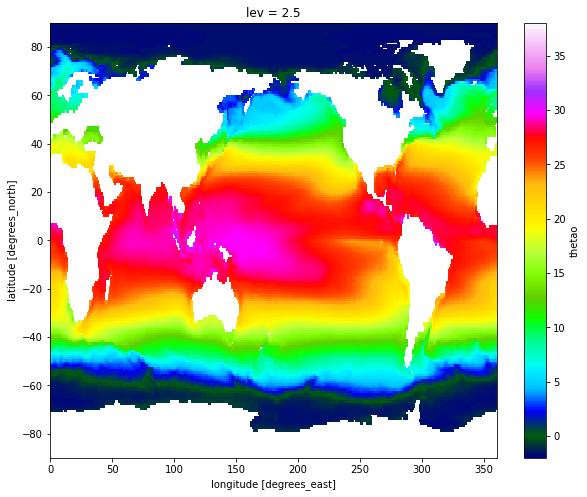

In [10]:
%time temp_mean.sel(lev=2.5).plot(figsize=[10, 8], vmin=-2, vmax=38, cmap='gist_ncar')